In [1]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the dataset
df=pd.read_csv("datafile_1.csv")
df.head()     #top 5 entries of the dataset

,TimeStamp,variable 2,variable 3,variable 4,variable 5,variable 6,variable 7
0,2019-11-05 20:21:24.089399+00:00,208.786,179.392,757.987,124.053,NaN,NaN
1,2019-11-05 20:21:25.220399+00:00,211.404,179.324,758.923,123.952,NaN,NaN
2,2019-11-05 20:21:28.242400+00:00,220.400,179.732,758.762,124.065,NaN,NaN
3,2019-11-05 20:21:29.642399+00:00,220.529,179.843,756.403,123.605,179.369,180.033
4,2019-11-05 20:21:30.145400+00:00,225.749,179.489,757.247,123.951,179.856,180.095


In [3]:
#Names of the columns in the data file
df.columns

Index(['TimeStamp', 'variable 2', 'variable 3', 'variable 4', 'variable 5',
       'variable 6', 'variable 7'],
      dtype='object')

**The column names are 'TimeStamp','variable 2','variable 3','variable 4','variable 5','variable 6', and 'variable 7'.**

In [4]:
#Size of the dataset/table
p=df.shape
p

(233418, 7)

In [5]:
print("The table consists of {}".format(p[0]), "rows and {}".format(p[1]), "columns")

The table consists of 233418 rows and 7 columns


In [6]:
#Identifying the percentage of missing values in each column
df.isnull().sum()/p[0]

TimeStamp     0.000000
variable 2    0.000000
variable 3    0.000000
variable 4    0.000000
variable 5    0.000000
variable 6    0.628105
variable 7    0.259693
dtype: float64

So, there are two columns, 'variable 6' and 'variable 7' having missing values. 

In [7]:
#Which column is having more than 50 % missing values
df.loc[:,df.isnull().sum()/p[0]>0.50]

,variable 6
0,NaN
1,NaN
2,NaN
3,179.369
4,179.856
...,...
233413,177.540
233414,NaN
233415,NaN
233416,NaN


**Hence only the column 'variable 6' is having more than 50% missing values.**

In [8]:
#Deleting the column 'variable 6'
df.drop(['variable 6'], axis=1)

,TimeStamp,variable 2,variable 3,variable 4,variable 5,variable 7
0,2019-11-05 20:21:24.089399+00:00,208.786,179.392,757.987,124.053,NaN
1,2019-11-05 20:21:25.220399+00:00,211.404,179.324,758.923,123.952,NaN
2,2019-11-05 20:21:28.242400+00:00,220.400,179.732,758.762,124.065,NaN
3,2019-11-05 20:21:29.642399+00:00,220.529,179.843,756.403,123.605,180.033
4,2019-11-05 20:21:30.145400+00:00,225.749,179.489,757.247,123.951,180.095
...,...,...,...,...,...,...
233413,2020-01-21 01:45:45.593599+00:00,203.539,178.067,756.155,123.612,NaN
233414,2020-01-21 01:48:11.389599+00:00,203.657,175.850,749.677,123.717,175.917
233415,2020-01-21 01:48:13.519599+00:00,203.998,175.580,749.400,124.359,176.346
233416,2020-01-21 01:50:05.545599+00:00,218.187,175.731,748.745,123.731,176.132


As we can see, 'variable 6' column is deleted.

In [9]:
#Function to Drop the columns with more than 50% missing values
def remove_null(data):
    data = data.loc[:, data.isnull().mean() <= 0.50]       #indexing only the columns having less than or equal to 50% missing values
    return data

In [10]:
remove_null(df)    #Checking the function with our dataset

,TimeStamp,variable 2,variable 3,variable 4,variable 5,variable 7
0,2019-11-05 20:21:24.089399+00:00,208.786,179.392,757.987,124.053,NaN
1,2019-11-05 20:21:25.220399+00:00,211.404,179.324,758.923,123.952,NaN
2,2019-11-05 20:21:28.242400+00:00,220.400,179.732,758.762,124.065,NaN
3,2019-11-05 20:21:29.642399+00:00,220.529,179.843,756.403,123.605,180.033
4,2019-11-05 20:21:30.145400+00:00,225.749,179.489,757.247,123.951,180.095
...,...,...,...,...,...,...
233413,2020-01-21 01:45:45.593599+00:00,203.539,178.067,756.155,123.612,NaN
233414,2020-01-21 01:48:11.389599+00:00,203.657,175.850,749.677,123.717,175.917
233415,2020-01-21 01:48:13.519599+00:00,203.998,175.580,749.400,124.359,176.346
233416,2020-01-21 01:50:05.545599+00:00,218.187,175.731,748.745,123.731,176.132


In [11]:
#Another approach to remove the columns with more than 50% missing values
df=df.dropna(thresh=int(0.50*len(df)), axis=1)
df.head()

,TimeStamp,variable 2,variable 3,variable 4,variable 5,variable 7
0,2019-11-05 20:21:24.089399+00:00,208.786,179.392,757.987,124.053,NaN
1,2019-11-05 20:21:25.220399+00:00,211.404,179.324,758.923,123.952,NaN
2,2019-11-05 20:21:28.242400+00:00,220.400,179.732,758.762,124.065,NaN
3,2019-11-05 20:21:29.642399+00:00,220.529,179.843,756.403,123.605,180.033
4,2019-11-05 20:21:30.145400+00:00,225.749,179.489,757.247,123.951,180.095


So, in this way also we can omit the columns containing more than 50% missing values. Here using the "thresh" parameter of the dropna method we are setting the threshold to 0.50 of the length (number of rows) of the dataset. 'axis=1' stands for columns.And again we get the perfect result!

In [12]:
#Identifying the rows containing missing values in all the columns except 'TimeStamp'
cols= ['variable 2','variable 3','variable 4','variable 5','variable 7']
df[df[cols].isnull().apply(lambda x: all(x), axis=1)]
df.shape

(233418, 6)

**We don't have any such row, in which all the features are missing except the 'TimeStamp'**

**But, if there were any, then we could identify and delete those rows simultaneously using a function as below.**

In [13]:
#function to check the empty rows and delete the same (columns can be taken as wish)
def void_rows(dataframe,cols):
    dataframe['void'] =dataframe[cols].isnull().apply(lambda x: all(x), axis=1)  #void will contain 'True' and 'False'
    dataframe=dataframe[dataframe['void']==False]        #Taking only the rows containing 'void'='False' or deleting the rows where 'void'='True'
    dataframe=dataframe.drop('void',axis=1)   #dropping the 'void' column
    return dataframe          #returning the final dataframe after the desired operation     

In [14]:
data=void_rows(df,cols)    #checking the function with our dataset
data.head()

,TimeStamp,variable 2,variable 3,variable 4,variable 5,variable 7
0,2019-11-05 20:21:24.089399+00:00,208.786,179.392,757.987,124.053,NaN
1,2019-11-05 20:21:25.220399+00:00,211.404,179.324,758.923,123.952,NaN
2,2019-11-05 20:21:28.242400+00:00,220.400,179.732,758.762,124.065,NaN
3,2019-11-05 20:21:29.642399+00:00,220.529,179.843,756.403,123.605,180.033
4,2019-11-05 20:21:30.145400+00:00,225.749,179.489,757.247,123.951,180.095


**The function works fine!**

In [15]:
#Size of the dataset/table
q=data.shape
print("The table consists of {}".format(q[0]), "rows and {}".format(q[1]), "columns")

The table consists of 233418 rows and 6 columns


In [16]:
#Checking the type of 'TimeStamp' variables
type(data.TimeStamp[0])

str

As it' a string, we will convert it to datetime variable to work with pandas time-series.

In [17]:
#Converting to DateTime variable
data['TimeStamp']=pd.to_datetime(data.TimeStamp)
data.dtypes       #Checking the datatypes of all the columns

TimeStamp     datetime64[ns, UTC]
variable 2                float64
variable 3                float64
variable 4                float64
variable 5                float64
variable 7                float64
dtype: object

Now TimeStamp is a datetime variable.

In [18]:
#sorting the 'TimeStamp' variable in increasing order
data = data.sort_values(by="TimeStamp")
data

,TimeStamp,variable 2,variable 3,variable 4,variable 5,variable 7
0,2019-11-05 20:21:24.089399+00:00,208.786,179.392,757.987,124.053,NaN
1,2019-11-05 20:21:25.220399+00:00,211.404,179.324,758.923,123.952,NaN
2,2019-11-05 20:21:28.242400+00:00,220.400,179.732,758.762,124.065,NaN
3,2019-11-05 20:21:29.642399+00:00,220.529,179.843,756.403,123.605,180.033
4,2019-11-05 20:21:30.145400+00:00,225.749,179.489,757.247,123.951,180.095
...,...,...,...,...,...,...
233413,2020-01-21 01:45:45.593599+00:00,203.539,178.067,756.155,123.612,NaN
233414,2020-01-21 01:48:11.389599+00:00,203.657,175.850,749.677,123.717,175.917
233415,2020-01-21 01:48:13.519599+00:00,203.998,175.580,749.400,124.359,176.346
233416,2020-01-21 01:50:05.545599+00:00,218.187,175.731,748.745,123.731,176.132


In [19]:
from datetime import datetime, timedelta
#dt1=data[(data['TimeStamp']>='2019-11-05 20:21:24.089399+00:00')&(data['TimeStamp']<str('2019-11-05 20:21:24.089399+00:00')+timedelta(days=5))]

In [20]:
#Printing the minimum and maximum value of the column 'TimeStamp'
data['TimeStamp'].min(), data['TimeStamp'].max()

(Timestamp('2019-11-05 20:21:24.089399+0000', tz='UTC'),
 Timestamp('2020-01-21 01:53:14.432600+0000', tz='UTC'))

In [21]:
#Here as we have sorted the dataframe we can do it in a simple way
data.TimeStamp[0], data.TimeStamp[233417]

(Timestamp('2019-11-05 20:21:24.089399+0000', tz='UTC'),
 Timestamp('2020-01-21 01:53:14.432600+0000', tz='UTC'))

In [22]:
#Creating a column to include the time difference in minutes between two consecutive 'TimeStamp' value
data['time_diff'] = (data['TimeStamp'] - data['TimeStamp'].shift(1)).astype('timedelta64[m]')
data['Date'] = pd.to_datetime(df['TimeStamp']).dt.date     #getting a date column for future use

The 'time_diff' column will help us in determining the Timestamps having more than 5 minutes gap with the next Timestamp data.

In [23]:
data=data.set_index('TimeStamp')         #seting "timeStamp" as the index of our dataset
data.head(20)

,variable 2,variable 3,variable 4,variable 5,variable 7,time_diff,Date
TimeStamp,,,,,,,
2019-11-05 20:21:24.089399+00:00,208.786,179.392,757.987,124.053,NaN,NaN,2019-11-05
2019-11-05 20:21:25.220399+00:00,211.404,179.324,758.923,123.952,NaN,0.0,2019-11-05
2019-11-05 20:21:28.242400+00:00,220.400,179.732,758.762,124.065,NaN,0.0,2019-11-05
2019-11-05 20:21:29.642399+00:00,220.529,179.843,756.403,123.605,180.033,0.0,2019-11-05
2019-11-05 20:21:30.145400+00:00,225.749,179.489,757.247,123.951,180.095,0.0,2019-11-05
2019-11-05 20:21:32.649400+00:00,225.777,180.024,758.419,124.324,179.436,0.0,2019-11-05
2019-11-05 20:21:33.147399+00:00,223.561,179.732,757.899,123.650,NaN,0.0,2019-11-05
2019-11-05 20:21:35.666399+00:00,211.311,179.148,757.881,124.288,NaN,0.0,2019-11-05
2019-11-05 20:21:37.294400+00:00,211.657,180.098,757.089,123.712,NaN,0.0,2019-11-05


In [24]:
#making the data a continuos one using forward fill with frequency of days
data = data.asfreq('D', method='ffill')
data

,variable 2,variable 3,variable 4,variable 5,variable 7,time_diff,Date
TimeStamp,,,,,,,
2019-11-05 20:21:24.089399+00:00,208.786,179.392,757.987,124.053,NaN,NaN,2019-11-05
2019-11-06 20:21:24.089399+00:00,218.476,176.274,756.864,123.671,176.368,5.0,2019-11-06
2019-11-07 20:21:24.089399+00:00,225.278,180.019,949.814,124.226,179.984,0.0,2019-11-07
2019-11-08 20:21:24.089399+00:00,215.598,168.432,761.880,124.313,168.460,0.0,2019-11-08
2019-11-09 20:21:24.089399+00:00,240.476,186.820,1886.441,128.118,NaN,0.0,2019-11-09
...,...,...,...,...,...,...,...
2020-01-16 20:21:24.089399+00:00,228.182,183.179,750.627,123.521,NaN,0.0,2020-01-09
2020-01-17 20:21:24.089399+00:00,228.182,183.179,750.627,123.521,NaN,0.0,2020-01-09
2020-01-18 20:21:24.089399+00:00,228.182,183.179,750.627,123.521,NaN,0.0,2020-01-09


Text(0.5, 0, 'TimeStamp')

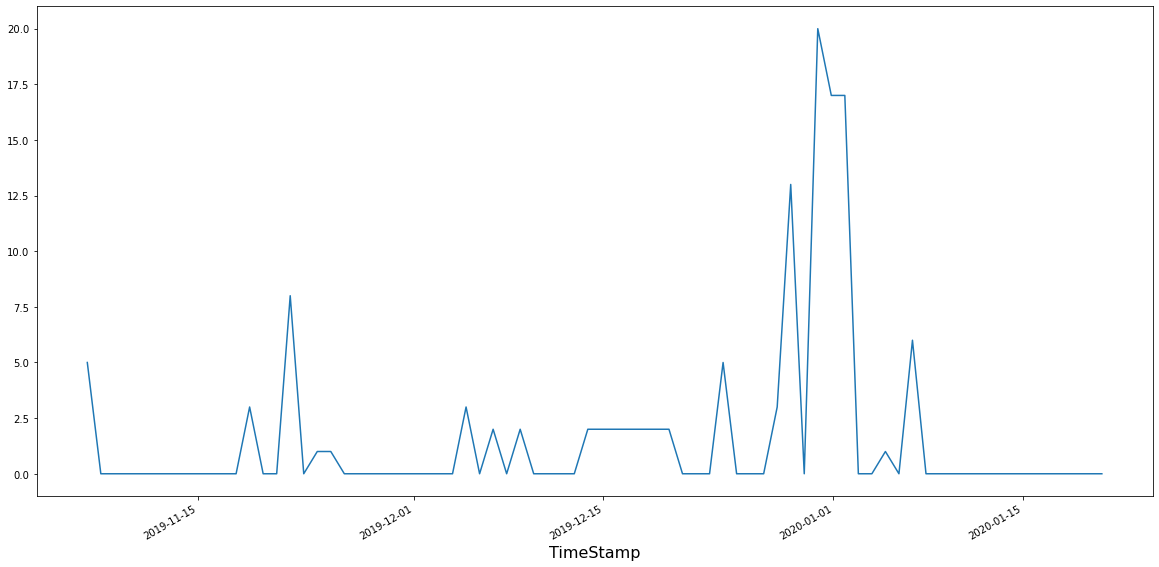

In [25]:
#Let's check the continuity & discontinuity of the TimeStamp based upon the 'time_diff'
data['time_diff'].plot(figsize=(20,10)) 
plt.xlabel("TimeStamp", fontsize=16)

**In the plot above, the continuity of the TimeStamp data is shown clearly using a line plot. The range of TimeStamp with more gaps are shown with the spikes in the plot.**

In [26]:
#getting the data, where gap in TimeStamp is 5 minutes or more
result=data[data['time_diff']>=5]
result

,variable 2,variable 3,variable 4,variable 5,variable 7,time_diff,Date
TimeStamp,,,,,,,
2019-11-06 20:21:24.089399+00:00,218.476,176.274,756.864,123.671,176.368,5.0,2019-11-06
2019-11-21 20:21:24.089399+00:00,223.579,174.548,946.444,123.657,174.560,8.0,2019-11-21
2019-12-23 20:21:24.089399+00:00,246.992,190.690,1959.021,126.617,190.556,5.0,2019-12-23
2019-12-28 20:21:24.089399+00:00,242.191,190.332,1977.979,127.241,NaN,13.0,2019-12-28
2019-12-30 20:21:24.089399+00:00,247.228,184.663,1982.904,127.041,NaN,20.0,2019-12-30
2019-12-31 20:21:24.089399+00:00,227.503,174.627,759.681,122.986,174.453,17.0,2019-12-31
2020-01-01 20:21:24.089399+00:00,227.503,174.627,759.681,122.986,174.453,17.0,2019-12-31
2020-01-06 20:21:24.089399+00:00,223.372,171.953,748.575,124.271,171.909,6.0,2020-01-06


**So, there are 1343 such entries, where the data is having discontinuity as the condition mentioned above.(>=5 minutes).**

Text(0.5, 0, 'TimeStamp')

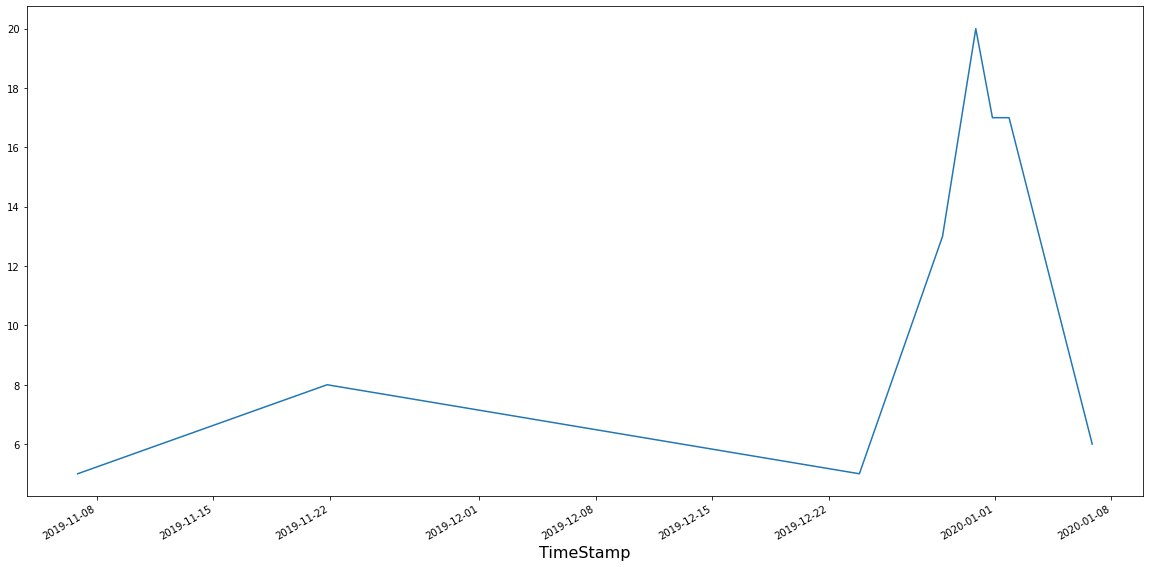

In [27]:
result['time_diff'].plot(figsize=(20,10))
plt.xlabel("TimeStamp", fontsize=16)

**Here is the continuity plot of the TimeStamps having time gap of 5 or more minutes.**

In [28]:
data.head()

,variable 2,variable 3,variable 4,variable 5,variable 7,time_diff,Date
TimeStamp,,,,,,,
2019-11-05 20:21:24.089399+00:00,208.786,179.392,757.987,124.053,NaN,NaN,2019-11-05
2019-11-06 20:21:24.089399+00:00,218.476,176.274,756.864,123.671,176.368,5.0,2019-11-06
2019-11-07 20:21:24.089399+00:00,225.278,180.019,949.814,124.226,179.984,0.0,2019-11-07
2019-11-08 20:21:24.089399+00:00,215.598,168.432,761.880,124.313,168.460,0.0,2019-11-08
2019-11-09 20:21:24.089399+00:00,240.476,186.820,1886.441,128.118,NaN,0.0,2019-11-09


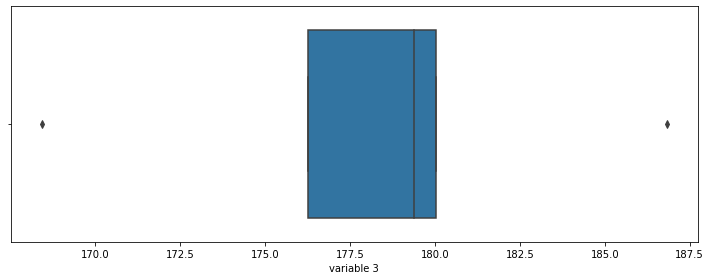

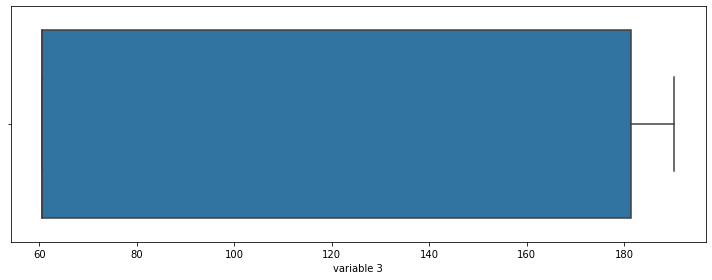

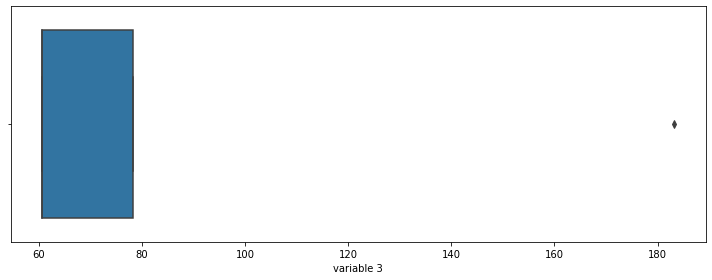

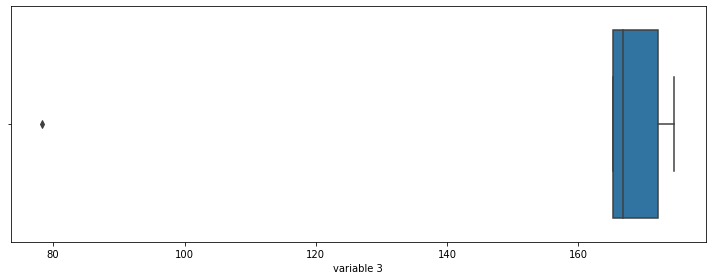

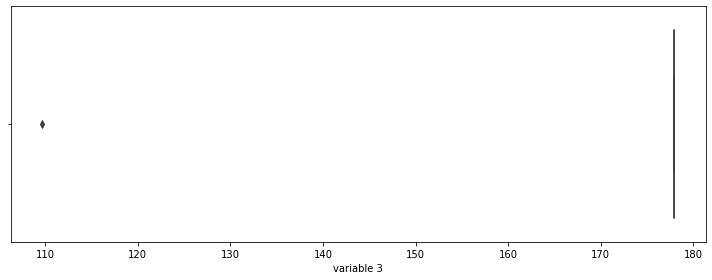

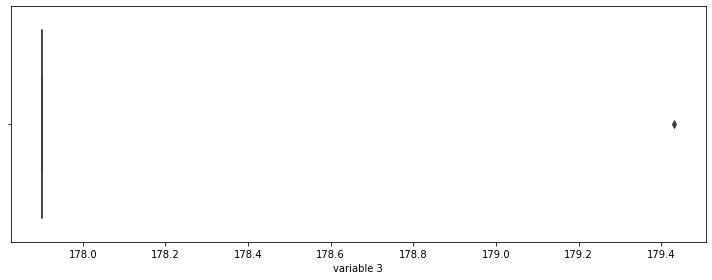

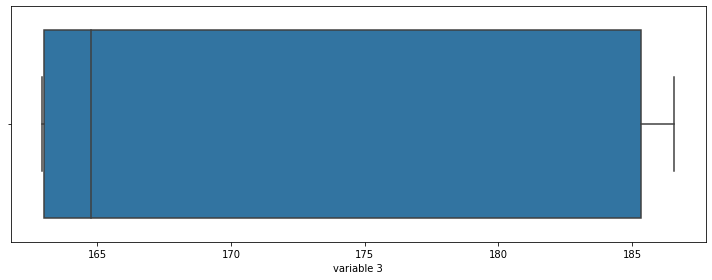

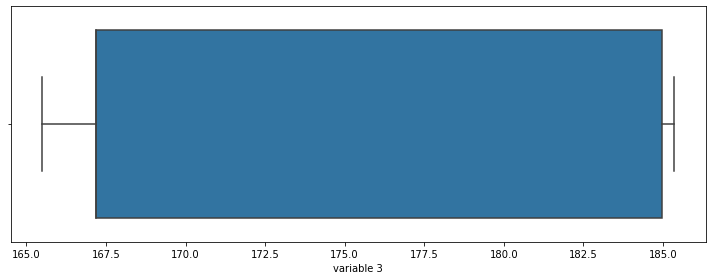

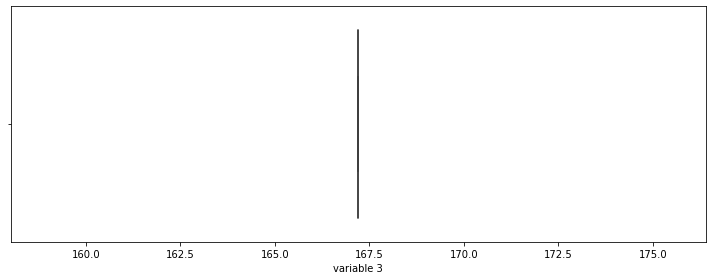

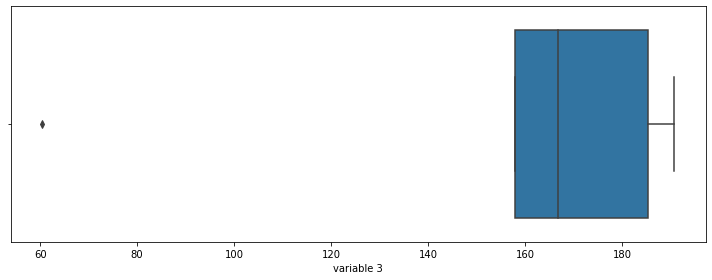

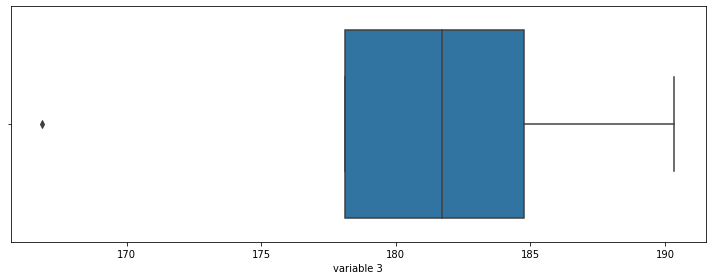

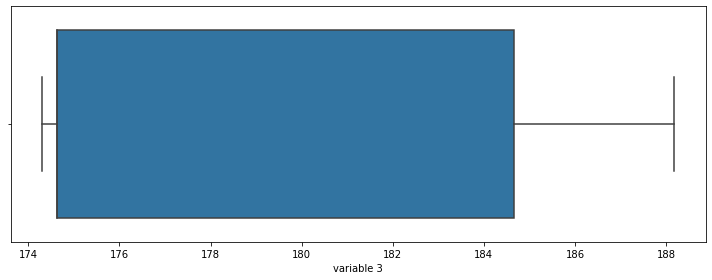

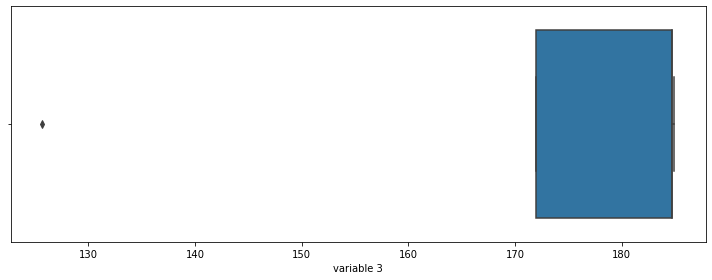

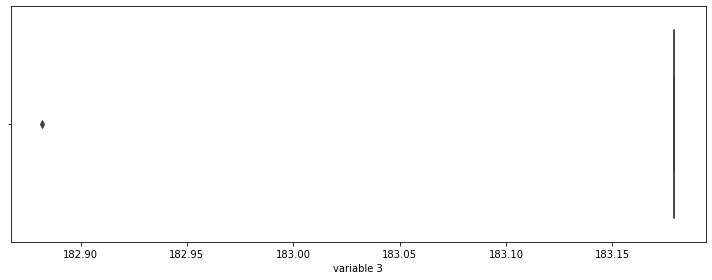

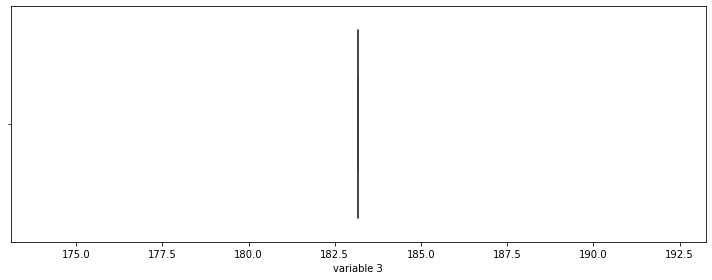

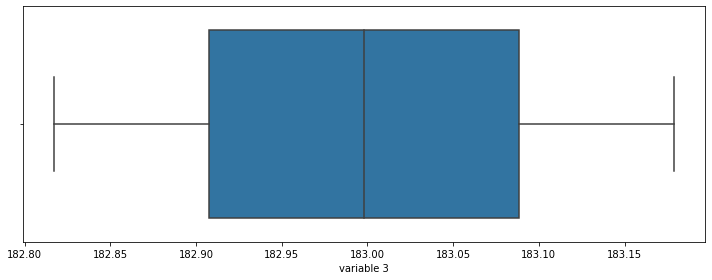

In [29]:
#To create the 5 days windows we will run our program (77/5)+1=16 times starting from 0.
for i in range(0,16,1):
    dt=data[np.logical_and(data.index >=min(data.index)+5*i*timedelta(days=1), data.index<min(data.index)+5*(i+1)*timedelta(days=1))]
    plt.figure(figsize=(10,4))
    plt.subplot(111)
    sns.boxplot(dt['variable 3'])
    plt.tight_layout()
    plt.show()


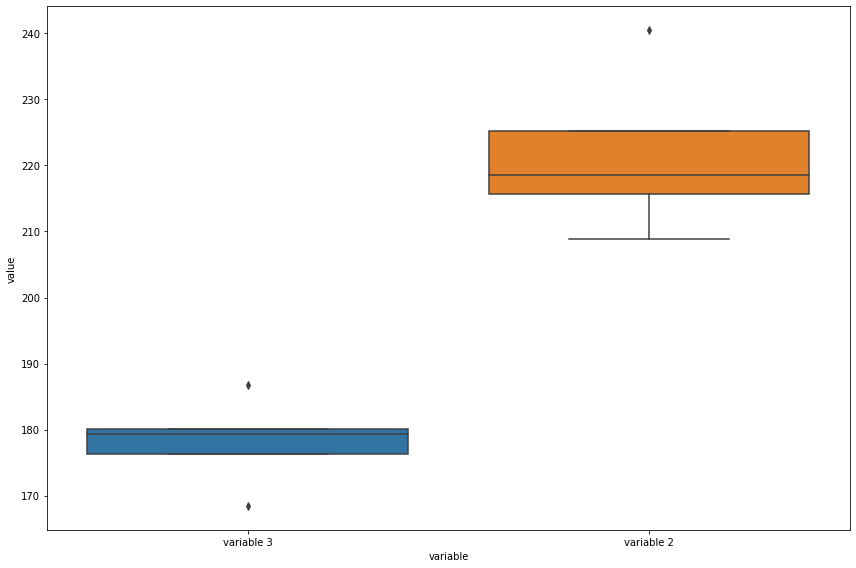

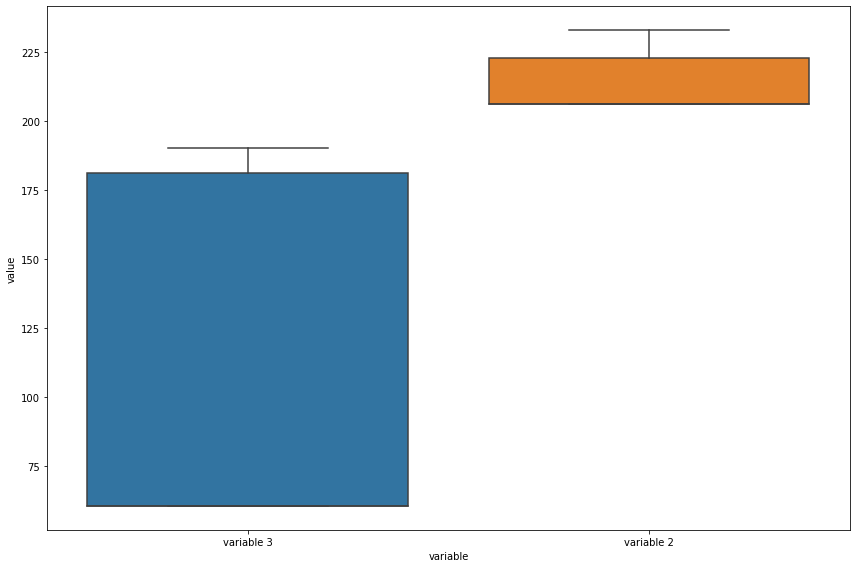

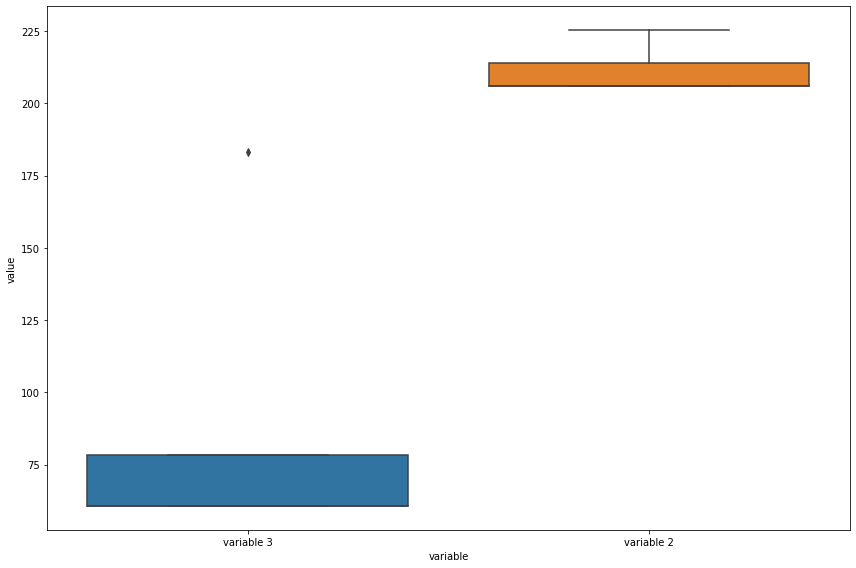

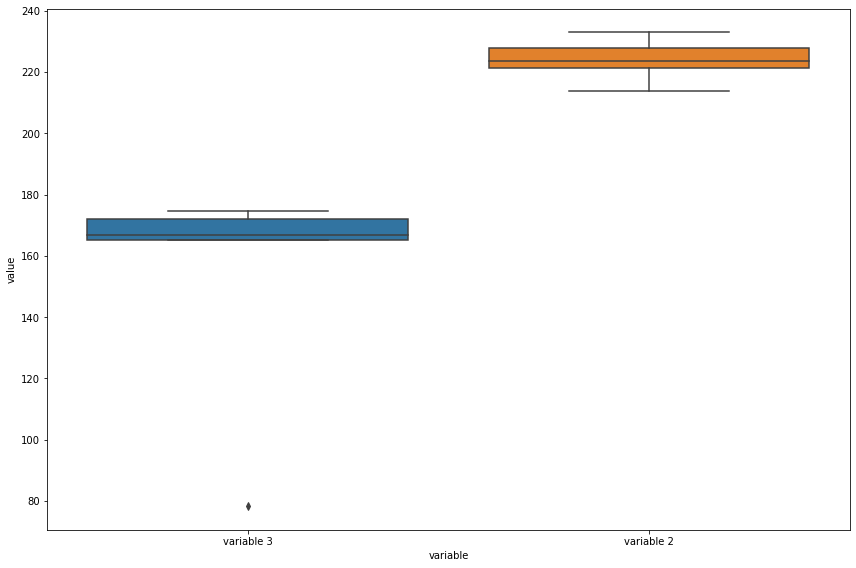

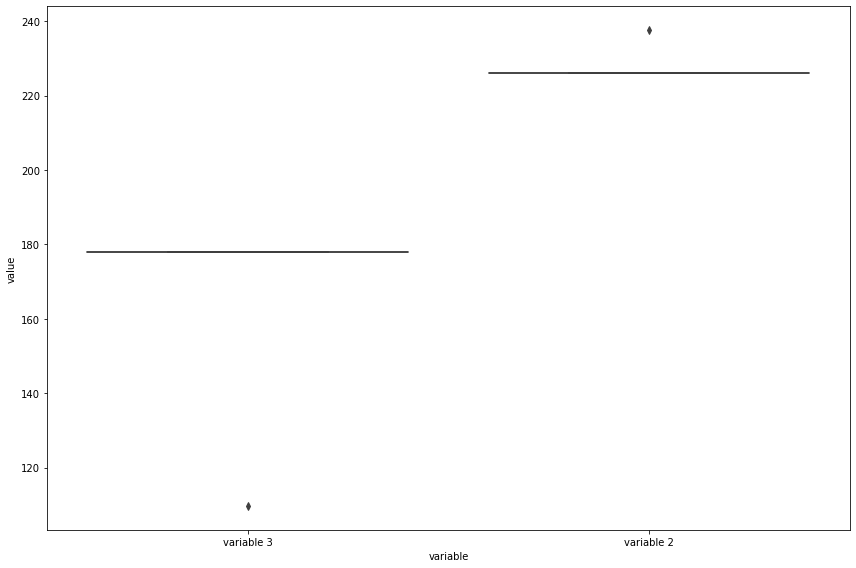

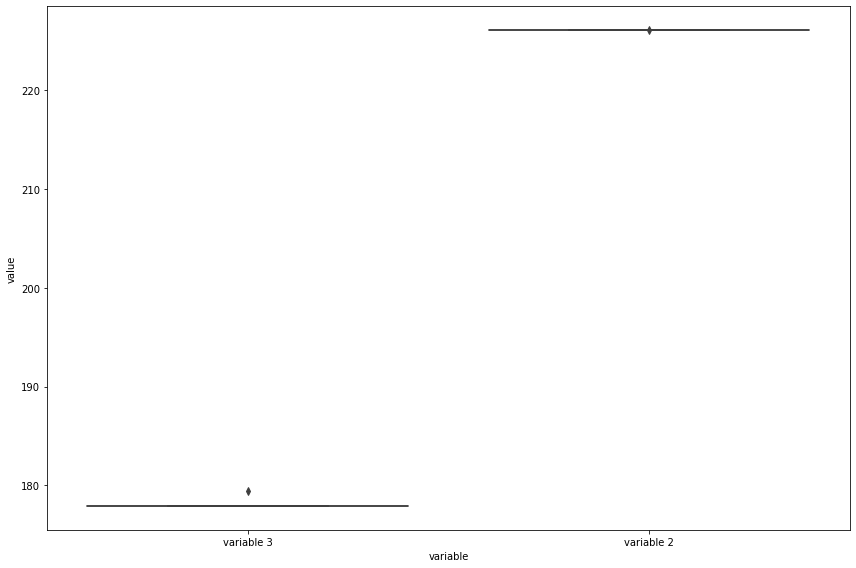

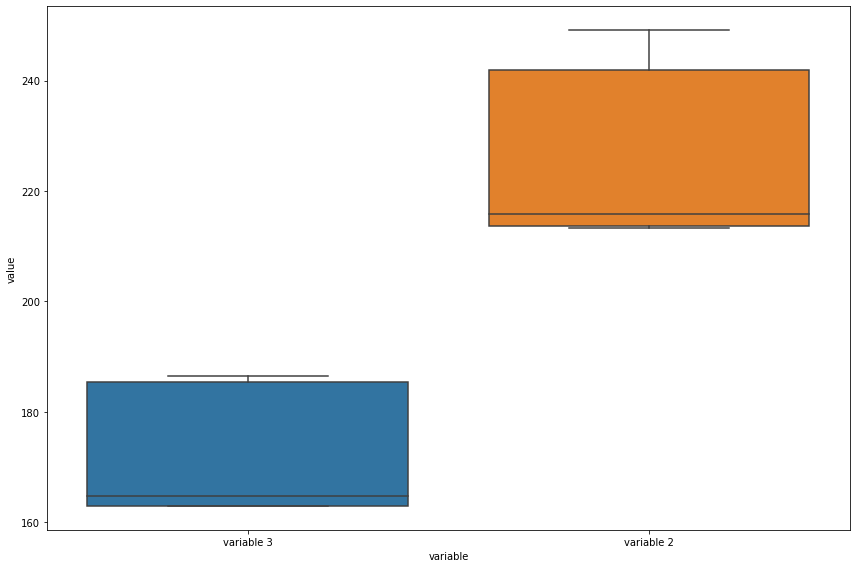

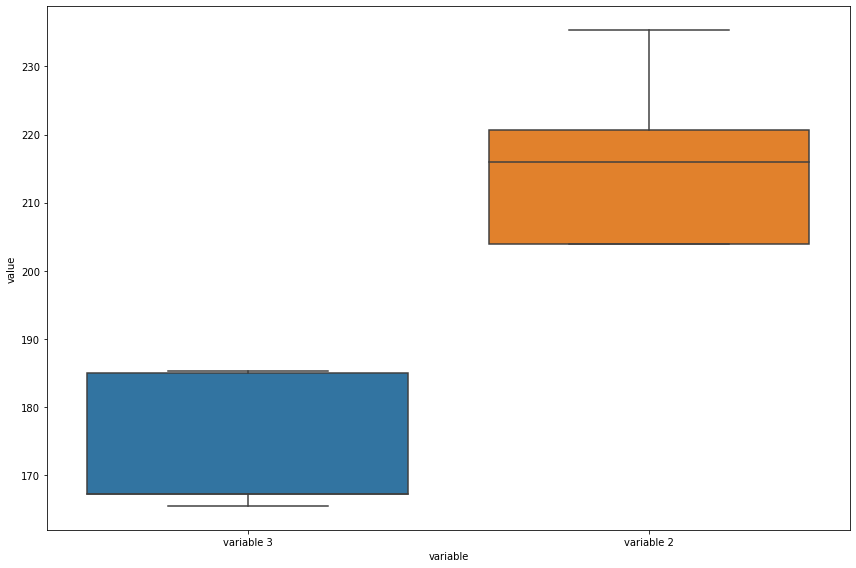

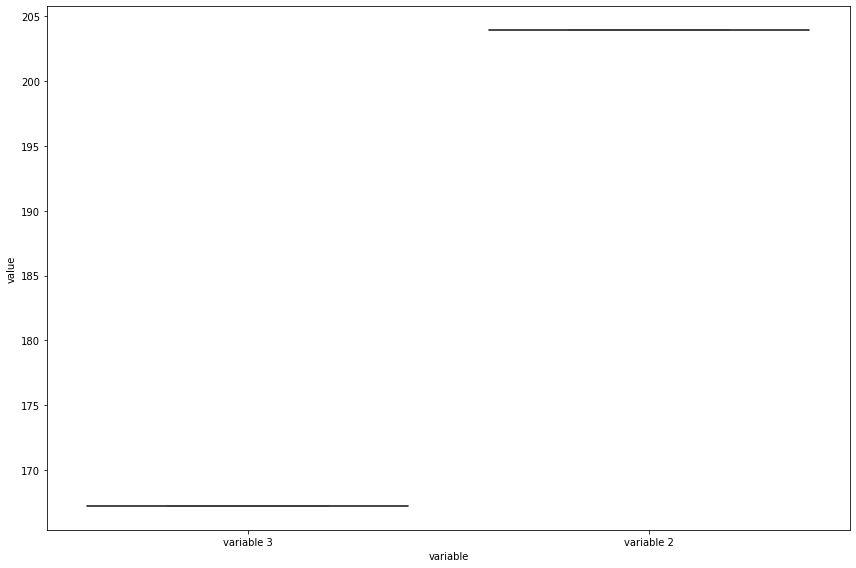

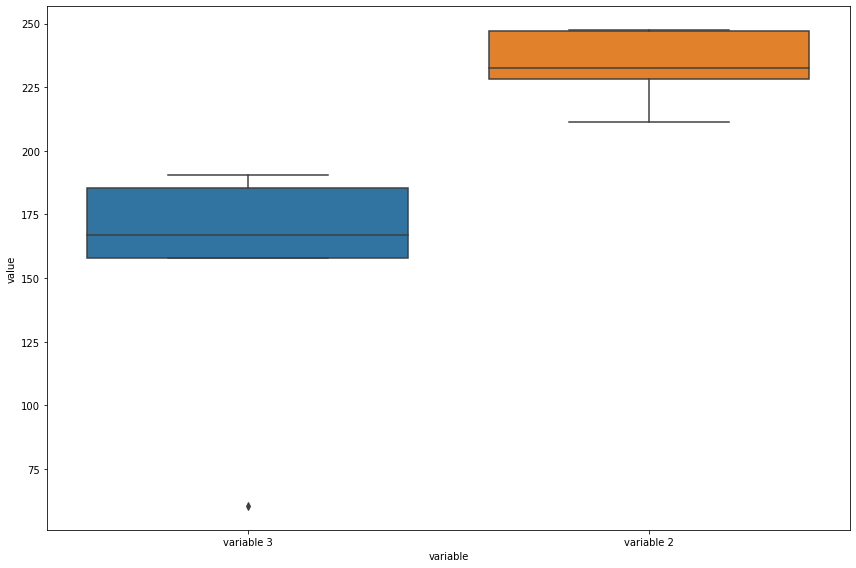

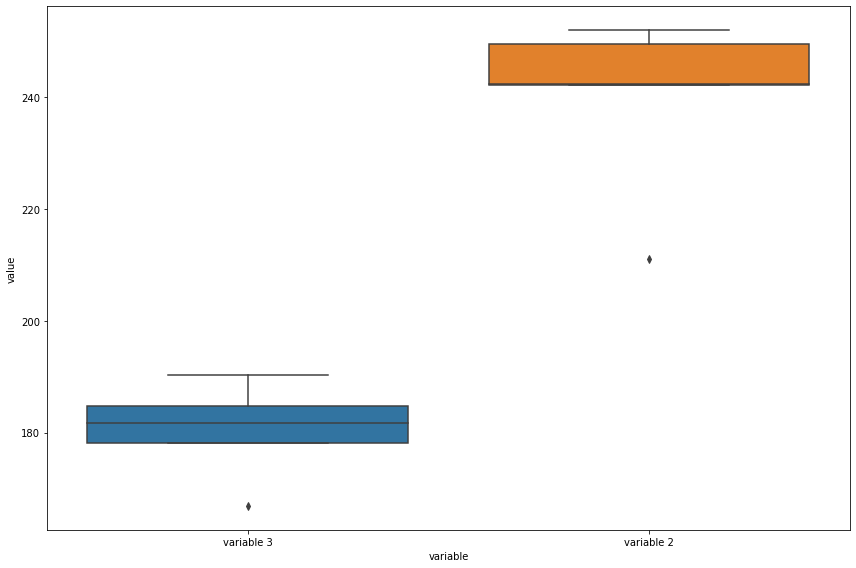

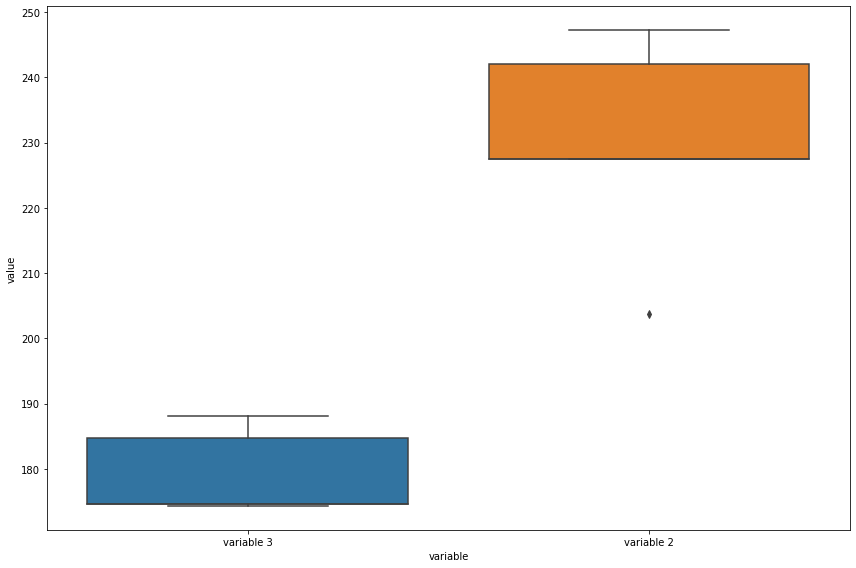

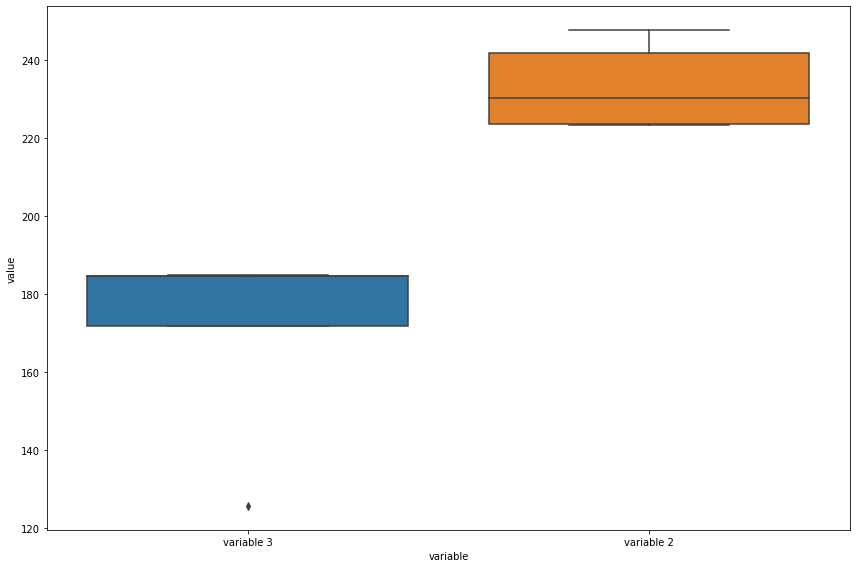

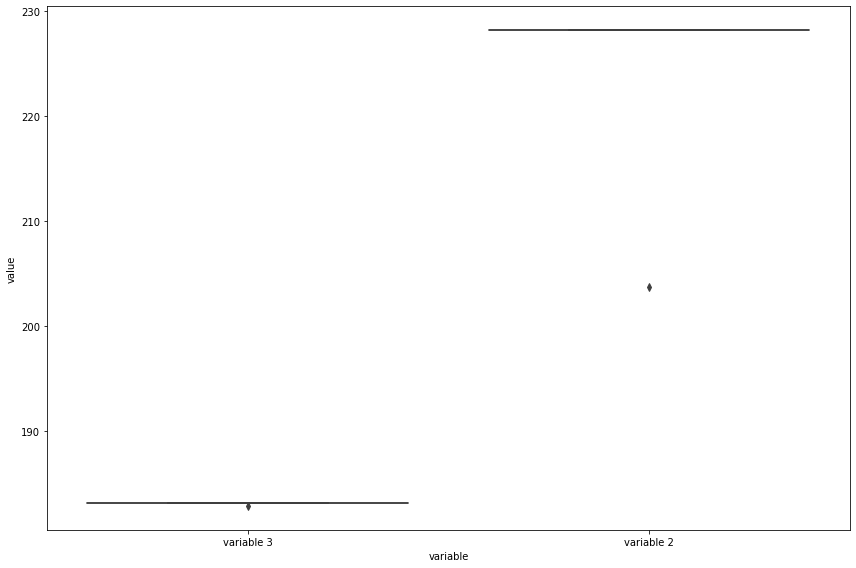

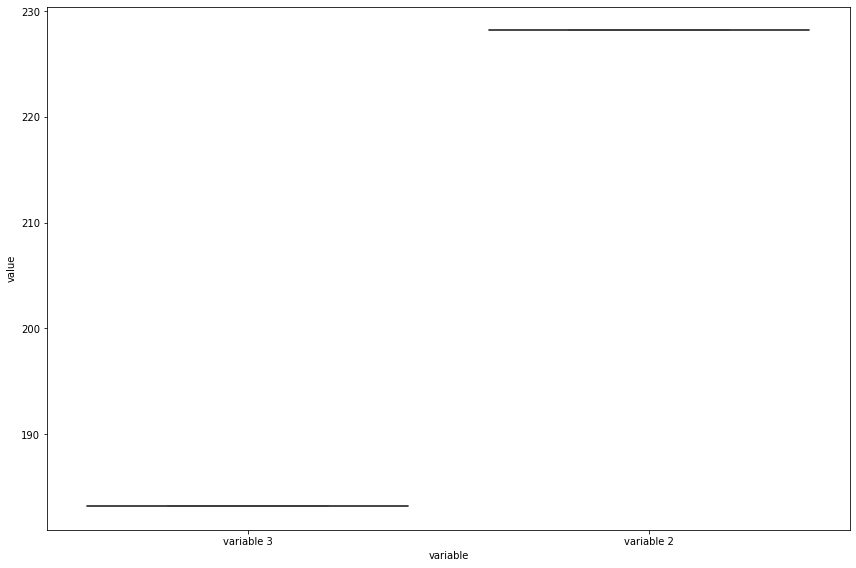

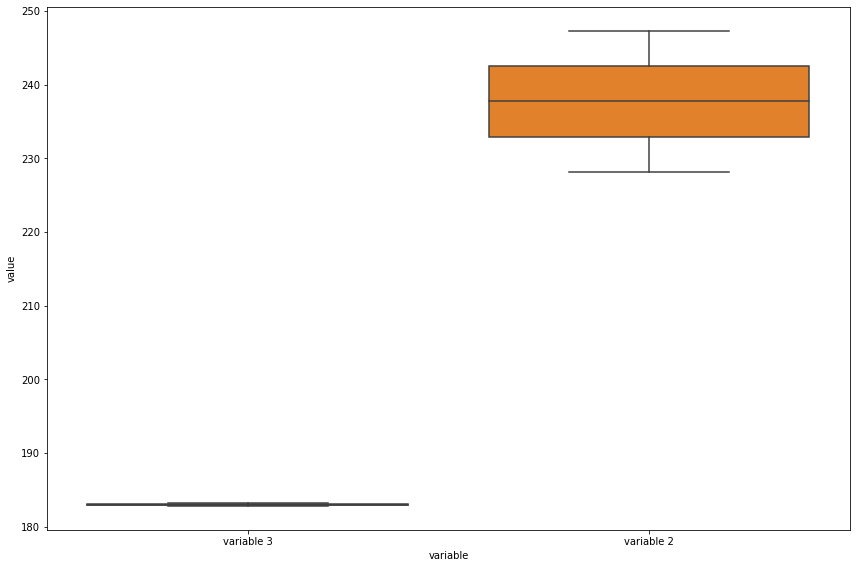

In [30]:
#Showing the distribution of 'variable 3' as well as 'variable 2' in each 5 day window via different colours in overlaying boxplots
for i in range(0,16,1):
    dt=data[np.logical_and(data.index >=min(data.index)+5*i*timedelta(days=1), data.index<min(data.index)+5*(i+1)*timedelta(days=1))]
    plt.figure(figsize=(12,8))
    plt.subplot(111)
    sns.boxplot(x="variable", y="value", data=pd.melt(dt[['variable 3','variable 2']]))
    plt.tight_layout()
    plt.show()

In [31]:
#Getting the median of variable 3 for each 5 day window
median_v3=[]
for i in range(0,16,1):
    dt=data[np.logical_and(data.index >=min(data.index)+5*i*timedelta(days=1), data.index<min(data.index)+5*(i+1)*timedelta(days=1))]
    med=dt['variable 3'].median()
    median_v3.append(med)
median_v3

[179.392,
 60.644,
 60.644,
 166.78900000000002,
 177.90200000000002,
 177.90200000000002,
 164.765,
 167.202,
 167.202,
 166.865,
 181.71200000000002,
 174.627,
 184.695,
 183.179,
 183.179,
 182.998]

In [32]:
#Getting the median of variable 2 for each 5 day window
median_v2=[]
for i in range(0,16,1):
    dt=data[np.logical_and(data.index >=min(data.index)+5*i*timedelta(days=1), data.index<min(data.index)+5*(i+1)*timedelta(days=1))]
    med=dt['variable 2'].median()
    median_v2.append(med)
median_v2

[218.476,
 206.172,
 206.172,
 223.579,
 226.075,
 226.075,
 215.81,
 216.00400000000002,
 203.94099999999997,
 232.65900000000002,
 242.389,
 227.503,
 230.37099999999998,
 228.18200000000002,
 228.18200000000002,
 237.7625]

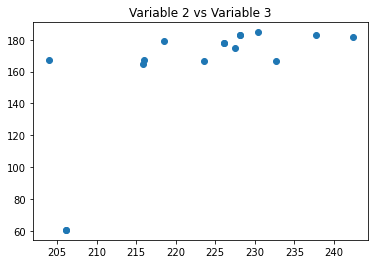

In [37]:
#Plotting the scatter plot between the medians of variable 2 and variable 3 of all the 5 day windows
plt.scatter(median_v2,median_v3)
plt.title("Variable 2 vs Variable 3")
plt.show()

**As the Scatter plot suggests, there is good correlation between the Variables throughout. It is clear that Pearson's Correlation would be greater than 50% here. That suggests, quiet good correlation between the features variable 2 and variable 3. So, let's calculate the Pearson's correlation using the inbuilt function of scipy library!**

In [35]:
#Calculating the covariance between the variables
covariance = np.cov(median_v2, median_v3)
covariance

array([[ 125.68822732,  297.4374098 ],
       [ 297.4374098 , 1590.28659126]])

In [36]:
# Calculating Pearson's correlation
from scipy.stats import pearsonr
corr, _ = pearsonr(median_v2, median_v3)
print('Pearsons correlation: %.4f' % corr)

Pearsons correlation: 0.6653


**Hence the actual correlation between variable 2 and variable 3 is 66.53%. So, it can be concluded that these features and quiet highly correlated as such!**

# Building the Regression Model

In [202]:
data.head()

,variable 2,variable 3,variable 4,variable 5,variable 7,time_diff,Date
TimeStamp,,,,,,,
2019-11-05 20:21:24.089399+00:00,208.786,179.392,757.987,124.053,NaN,NaN,2019-11-05
2019-11-06 20:21:24.089399+00:00,218.476,176.274,756.864,123.671,176.368,5.0,2019-11-06
2019-11-07 20:21:24.089399+00:00,225.278,180.019,949.814,124.226,179.984,0.0,2019-11-07
2019-11-08 20:21:24.089399+00:00,215.598,168.432,761.880,124.313,168.460,0.0,2019-11-08
2019-11-09 20:21:24.089399+00:00,240.476,186.820,1886.441,128.118,NaN,0.0,2019-11-09


In [203]:
data=data.drop(['time_diff','Date'], axis=1)     #dropping the columns created for previous operations
data.head()

,variable 2,variable 3,variable 4,variable 5,variable 7
TimeStamp,,,,,
2019-11-05 20:21:24.089399+00:00,208.786,179.392,757.987,124.053,NaN
2019-11-06 20:21:24.089399+00:00,218.476,176.274,756.864,123.671,176.368
2019-11-07 20:21:24.089399+00:00,225.278,180.019,949.814,124.226,179.984
2019-11-08 20:21:24.089399+00:00,215.598,168.432,761.880,124.313,168.460
2019-11-09 20:21:24.089399+00:00,240.476,186.820,1886.441,128.118,NaN


In [204]:
#null values
data.isnull().sum()

variable 2     0
variable 3     0
variable 4     0
variable 5     0
variable 7    22
dtype: int64

As there is a good number of Null-values, we wouldn't go for dropping the column, rather we wolud try to treat the Null values as efficiently as possible.

In [205]:
#Using backfill method to fill the Null-values with the next value
import math
median_var7=math.floor(data['variable 7'].median())
median_var7

174

In [206]:
data['variable 7']=data['variable 7'].fillna(median_var7)

In [207]:
data.head()

,variable 2,variable 3,variable 4,variable 5,variable 7
TimeStamp,,,,,
2019-11-05 20:21:24.089399+00:00,208.786,179.392,757.987,124.053,174.000
2019-11-06 20:21:24.089399+00:00,218.476,176.274,756.864,123.671,176.368
2019-11-07 20:21:24.089399+00:00,225.278,180.019,949.814,124.226,179.984
2019-11-08 20:21:24.089399+00:00,215.598,168.432,761.880,124.313,168.460
2019-11-09 20:21:24.089399+00:00,240.476,186.820,1886.441,128.118,174.000


In [208]:
#Checking whether the null values are filled or not
data.isnull().sum()

variable 2    0
variable 3    0
variable 4    0
variable 5    0
variable 7    0
dtype: int64

**We have successfully treated the Null-values.**

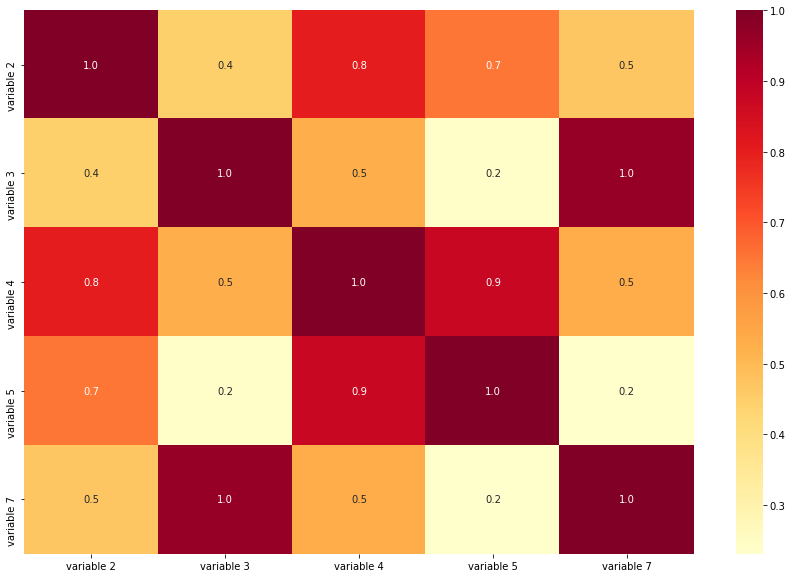

In [209]:
#Let's check the correlation between the features
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(method='pearson'), annot=True, fmt= '.1f',ax=ax, cmap="YlOrRd")

As seen from the heatmap, maximum correlation (1) is there between variable 3 and variable 7 and there is a high correlation between variable 4 and variable 5 (0.9) also.The correlation of variable 4 is high (0.8) with our target variable, variable 2.

In [210]:
#Set the independent and dependent variable
X=data[['variable 3','variable 4', 'variable 5', 'variable 7']]
y=data['variable 2']

In [211]:
#splitting the dataset using Scikit-Learn library
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=0)

In [212]:
#checking the shape of trining data and test data
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(51, 4) (51,)
(26, 4) (26,)


In [213]:
#Applying Multiple Linear Regression model and training the model
from sklearn.linear_model import LinearRegression  
MLR1 = LinearRegression()  
MLR1.fit(X_train, y_train)

LinearRegression()

In [214]:
print(MLR1.coef_)    #Checking the coefficients

[-0.12689555  0.02031047 -0.49592293  0.15522452]


In [215]:
#predicting with test data
y_pred = MLR1.predict(X_test)

In [216]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test, y_pred)
mse=(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred) 
print("MAE=", mae)
print("MSE=", mse)
print("R^2 SCORE=", r2)

MAE= 6.325325427253196
MSE= 68.374612343091
R^2 SCORE= 0.6525792232790719


**The performance of this MLR model is average! We would go for other models to get a better model performance.**

**Backward Elimination**

**Using OLS method to improve the model.**

In [217]:
import statsmodels.api as sm

In [218]:
X_opt = X_train[['variable 3','variable 4', 'variable 5', 'variable 7']]
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             variable 2   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              9178.
Date:                Sat, 10 Oct 2020   Prob (F-statistic):                    2.50e-67
Time:                        18:32:17   Log-Likelihood:                         -178.50
No. Observations:                  51   AIC:                                      365.0
Df Residuals:                      47   BIC:                                      372.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
variable 3    -0.1314      0.095     -1.383      0.173      -0.322       0.060
variable 4     0.0150      0.003      5.550      0.000       0.010       0.020
variable 5     1.6078      0.041     39.109      0.000       1.525       1.691
variable 7     0.1901      0.100      1.897      0.064      -0.011       0.392
==============================================================================
Omnibus:                        7.186   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                6.723
Skew:                          -0.884   Prob(JB):                       0.0347
Kurtosis:                       3.190   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [219]:
print(regressor_OLS.mse_resid) #Mean squared errors of the residuals
print(regressor_OLS.mse_total) #Total Mean Squared errors 

69.66232914804539
50208.840055313725


**As per the OLS summary, p-value of all the variables are less than 0.05 except variable 3 and variable 7 and the adjusted R-Squared value is 0.999. Which is really awesome. Here we have to go for Back Elimination. OLS model is doing great!**

**Let's try the Ridge regression once.**

In [220]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.0001)           #creating the object

In [221]:
R.fit(X_train,y_train)        #fitting the training data

Ridge(alpha=0.0001)

In [222]:
y2_pred=R.predict(X_test)     #predicting the result on test data

In [223]:
mae=mean_absolute_error(y_test, y2_pred)
mse=(mean_squared_error(y_test,y2_pred))
r2 = r2_score(y_test,y2_pred) 
print("MAE=", mae)
print("MSE=", mse)
print("R^2 SCORE=", r2)

MAE= 6.325325966598873
MSE= 68.37462526661193
R^2 SCORE= 0.6525791576128909


**Our Ridge Regression model is perfoming same as the Multiple Linear Regression model. It is also acceptable.**

**Applying Random Forest regressor**

In [224]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [225]:
y3_pred=rfr.predict(X_test)

In [226]:
mae=mean_absolute_error(y_test, y3_pred)
mse=(mean_squared_error(y_test,y3_pred))
r2 = r2_score(y_test,y3_pred) 
print("MAE=", mae)
print("MSE=", mse)
print("R^2 SCORE=", r2)

MAE= 2.4832253846154493
MSE= 19.992303174030457
R^2 SCORE= 0.8984163674331416


**So, Random Forest regressor is working awesome here. It shows accuracy as high as 90% approx and the Mean Squared Error is as low as 20 approx.**

**Let's check our MLR model after Back Elimination as per the OLS method.**

In [228]:
#Set the independent and dependent variable
X2=data[['variable 4','variable 5']]
y2=data['variable 2']

In [229]:
#splitting the dataset using Scikit-Learn library
from sklearn.model_selection import train_test_split  
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,test_size=0.20, random_state=70)

**Now we will try another MLR model with this processed data.**

In [230]:
#Applying Multiple Linear Regression model and training the model
from sklearn.linear_model import LinearRegression  
MLR3 = LinearRegression()  
MLR3.fit(X2_train, y2_train)

LinearRegression()

In [231]:
#predicting with test data
y5_pred = MLR3.predict(X2_test)

In [232]:
#getting the performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y2_test, y5_pred)
mse=mean_squared_error(y2_test,y5_pred)
r2 = r2_score(y2_test,y5_pred) 
print("MAE=", mae)
print("MSE=", mse)
print("R^2 SCORE=", r2)

MAE= 6.388969009288907
MSE= 65.02913067677221
R^2 SCORE= 0.7066960329457868


**As a conclusion we can say the OLS method performs best, comes up with adjusted R-squared value of 0.999. And Multiple Linear Regression and Ridge regression are doing approximately same. The final MLR model is performing quiet better than the previous model after performing back elimination.
Random Forest is doing awesome with nearly 90% accuracy, we can consider it as one of the best working model.**

In [33]:
plt.scatter?